**<H1>Assesment Skygeni<H1>**

---



In [159]:
# Libraries used
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<H1>Loading the data from CSV in drive </H1>

In [160]:
# added all the files from drive to this notebook.
industry_client_details=pd.read_csv('/content/drive/My Drive/assesment-skygeni/Copy_of_industry_client_details.csv')
industry_client_details.head(10)

finanical_information=pd.read_csv('/content/drive/My Drive/assesment-skygeni/Copy_of_finanical_information.csv')
finanical_information.head(10)

subscription_information=pd.read_csv('/content/drive/My Drive/assesment-skygeni/Copy_of_subscription_information.csv')
subscription_information.head(10)

payment_information=pd.read_csv('/content/drive/My Drive/assesment-skygeni/Copy_of_payment_information.csv')
payment_information.head(10)

,client_id,payment_date,amount_paid,payment_method
0,6292156167,9/16/2019,447.0,Bank Transfer
1,7462725203,5/21/2018,379.7,Bank Transfer
2,4698004907,9/11/2021,435.1,Check
3,3510240337,12/7/2020,413.1,Check
4,7501599785,3/4/2019,61.1,Bank Transfer
5,8719792472,2/10/2018,73.8,Credit Card
6,3325348894,7/9/2019,348.1,Credit Card
7,9031632460,7/6/2019,222.9,Check
8,5319487809,3/2/2019,90.7,Bank Transfer
9,4280387012,11/25/2022,77.1,Check


**Displaying and Checking the given data**

In [161]:
industry_client_details.head(5)

,client_id,company_size,industry,location
0,4280387012,Large,Finance Lending,Mumbai
1,2095513148,Small,Finance Lending,Chennai
2,7225516707,Medium,Finance Lending,New Delhi
3,8093537819,Large,Block Chain,Mumbai
4,4387541014,Medium,Hyper Local,Banglore


In [162]:
finanical_information.head(5)

,Unnamed: 0,start_date,end_date,inflation_rate,gdp_growth_rate
0,0,2018-01-01,2018-03-31,5.77,3.51
1,1,2018-04-01,2018-06-30,1.17,2.15
2,2,2018-07-01,2018-09-30,1.56,1.82
3,3,2018-10-01,2018-12-31,2.78,2.43
4,4,2019-01-01,2019-03-31,6.91,3.44


In [163]:
subscription_information.head(5)

,client_id,subscription_type,start_date,end_date,renewed
0,1131383004,Yearly,2020-11-11,2021-11-11,False
1,4309371709,Monthly,2021-05-24,2021-06-23,True
2,3183675157,Yearly,2021-12-25,2022-12-25,True
3,5371694837,Monthly,2020-03-14,2020-04-13,True
4,5157113076,Monthly,2019-11-07,2019-12-07,False


In [164]:
payment_information.head(5)

,client_id,payment_date,amount_paid,payment_method
0,6292156167,9/16/2019,447.0,Bank Transfer
1,7462725203,5/21/2018,379.7,Bank Transfer
2,4698004907,9/11/2021,435.1,Check
3,3510240337,12/7/2020,413.1,Check
4,7501599785,3/4/2019,61.1,Bank Transfer


**Question1** How many finance lending and blockchain clients does the organization have?

In [165]:
# Counting the number of Finanical Lending clients
Finance = industry_client_details[industry_client_details['industry'].isin(['Finance Lending'])]
f1=Finance['client_id'].value_counts().sum()
print("Finance Lending:",f1)

Finance Lending: 22


In [166]:
# Counting the number of Block chain Lending clients
Blockchain = industry_client_details[industry_client_details['industry'].isin(['Block Chain'])]
b1=Blockchain['client_id'].value_counts().sum()
print("Block chain lending:",b1)

Block chain lending: 25


In [167]:
# Total number of finance lending and block chain clients
Finance_blockchain = industry_client_details[industry_client_details['industry'].isin(['Finance Lending', 'Block Chain'])]

# Count occurrences of each client
industry_count = Finance_blockchain['client_id'].value_counts().sum()

print("The total number  finance lending and blockchain clients :",industry_count)

The total number  finance lending and blockchain clients : 47


**Question2** Which industry in the organization has the highest renewal rate?

In [168]:
# To answer the question 2 we need to combine bothe industryclient details and subscription information details
merged_industry_client_subscription_details = pd.merge(industry_client_details, subscription_information, on='client_id', how='inner')

print(merged_industry_client_subscription_details)

     client_id company_size         industry   location subscription_type  \
0   4280387012        Large  Finance Lending     Mumbai            Yearly   
1   2095513148        Small  Finance Lending    Chennai           Monthly   
2   7225516707       Medium  Finance Lending  New Delhi            Yearly   
3   8093537819        Large      Block Chain     Mumbai           Monthly   
4   4387541014       Medium      Hyper Local   Banglore           Monthly   
..         ...          ...              ...        ...               ...   
95  9159056053       Medium           Gaming  New Delhi            Yearly   
96  1077708772        Small      Block Chain     Mumbai            Yearly   
97  4361672518        Small               AI  New Delhi           Monthly   
98  6751372012        Large      Hyper Local     Mumbai           Monthly   
99  6209923307       Medium           Gaming    Chennai           Monthly   

    start_date    end_date  renewed  
0   2022-11-25  2023-11-25     True  

In [169]:
True_counts = merged_industry_client_subscription_details[
    # Filtering the dataset to include only rows where the 'renewed' column is True
merged_industry_client_subscription_details['renewed'] == True # Group the filtered dataset by the 'industry'
    #column and count the number of occurrences in each industry
    ].groupby('industry').size().reset_index(#Sort the results in descending order making true_count as column_name
        name='true_count').sort_values(
    by='true_count', ascending=False)

print(True_counts)

          industry  true_count
3           Gaming          16
2  Finance Lending          12
1      Block Chain          11
4      Hyper Local           9
0               AI           7


<ipython-input-170-f99dce4f5034>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='industry', y='true_count', data=True_counts, palette='viridis')


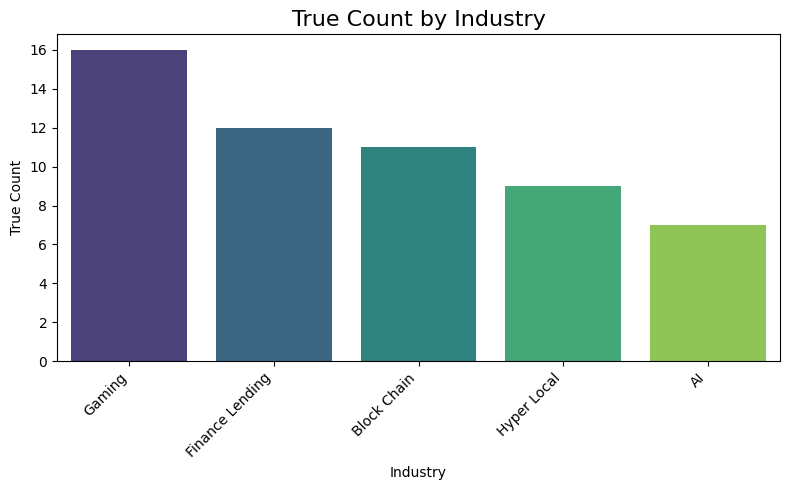

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
#BARGRAPH showcasing number of renewals
plt.figure(figsize=(8, 5))
sns.barplot(x='industry', y='true_count', data=True_counts, palette='viridis')

# Title and labels
plt.title("True Count by Industry", fontsize=16)
plt.xlabel("Industry", fontsize=10)
plt.ylabel("True Count", fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

**NOTE:** Based on above output we can infer that Gaming industry has highest renewals.

**Question3**
What was the average inflation rate when their subscriptions were renewed?

In [171]:
subscription_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   client_id          100 non-null    int64 
 1   subscription_type  100 non-null    object
 2   start_date         100 non-null    object
 3   end_date           100 non-null    object
 4   renewed            100 non-null    bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 3.4+ KB


In [172]:
#converting object type date columns in both industry client subscription details and financial information tables .
merged_industry_client_subscription_details['end_date']=pd.to_datetime(merged_industry_client_subscription_details['end_date'])
merged_industry_client_subscription_details['start_date']=pd.to_datetime(merged_industry_client_subscription_details['start_date'])

finanical_information['start_date']=pd.to_datetime(finanical_information['start_date'])
finanical_information['end_date']=pd.to_datetime(finanical_information['end_date'])

In [173]:
# checking if the dtypes are changed successfully
merged_industry_client_subscription_details.info()
finanical_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   client_id          100 non-null    int64         
 1   company_size       100 non-null    object        
 2   industry           100 non-null    object        
 3   location           100 non-null    object        
 4   subscription_type  100 non-null    object        
 5   start_date         100 non-null    datetime64[ns]
 6   end_date           100 non-null    datetime64[ns]
 7   renewed            100 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(1), object(4)
memory usage: 5.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       21 non-null     int64         
 1   sta

In [174]:
# adding seperate column for merged_industry_client_subscription_details and finanical_information to take quarter start date as inflation point
merged_industry_client_subscription_details['quarter_start_date'] = merged_industry_client_subscription_details['start_date'].dt.to_period('Q').dt.start_time

print(merged_industry_client_subscription_details['quarter_start_date'].nunique)


finanical_information['quarter_start_date'] = finanical_information['start_date'].dt.to_period('Q').dt.start_time

print(finanical_information['quarter_start_date'].nunique)


<bound method IndexOpsMixin.nunique of 0    2022-10-01
1    2021-10-01
2    2021-01-01
3    2019-07-01
4    2018-10-01
        ...    
95   2022-04-01
96   2019-07-01
97   2019-01-01
98   2018-04-01
99   2021-07-01
Name: quarter_start_date, Length: 100, dtype: datetime64[ns]>
<bound method IndexOpsMixin.nunique of 0    2018-01-01
1    2018-04-01
2    2018-07-01
3    2018-10-01
4    2019-01-01
5    2019-04-01
6    2019-07-01
7    2019-10-01
8    2020-01-01
9    2020-04-01
10   2020-07-01
11   2020-10-01
12   2021-01-01
13   2021-04-01
14   2021-07-01
15   2021-10-01
16   2022-01-01
17   2022-04-01
18   2022-07-01
19   2022-10-01
20   2023-01-01
Name: quarter_start_date, dtype: datetime64[ns]>


In [175]:
# Since the inflation data is split into quarters to look up inflation rate for each client we are using the start date as join condition
#merging merged_industry_client_subscription_details
merged_df = pd.merge(merged_industry_client_subscription_details, finanical_information, on='quarter_start_date', how='left')

In [176]:
merged_df

,client_id,company_size,industry,location,subscription_type,start_date_x,end_date_x,renewed,quarter_start_date,Unnamed: 0,start_date_y,end_date_y,inflation_rate,gdp_growth_rate
0,4280387012,Large,Finance Lending,Mumbai,Yearly,2022-11-25,2023-11-25,True,2022-10-01,19,2022-10-01,2022-12-31,4.40,1.05
1,2095513148,Small,Finance Lending,Chennai,Monthly,2021-11-03,2021-12-03,False,2021-10-01,15,2021-10-01,2021-12-31,7.32,1.73
2,7225516707,Medium,Finance Lending,New Delhi,Yearly,2021-01-19,2022-01-19,True,2021-01-01,12,2021-01-01,2021-03-31,2.57,1.18
3,8093537819,Large,Block Chain,Mumbai,Monthly,2019-09-14,2019-10-14,False,2019-07-01,6,2019-07-01,2019-09-30,7.71,1.35
4,4387541014,Medium,Hyper Local,Banglore,Monthly,2018-11-08,2018-12-08,False,2018-10-01,3,2018-10-01,2018-12-31,2.78,2.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9159056053,Medium,Gaming,New Delhi,Yearly,2022-05-28,2023-05-28,False,2022-04-01,17,2022-04-01,2022-06-30,6.80,3.49
96,1077708772,Small,Block Chain,Mumbai,Yearly,2019-07-06,2020-07-05,False,2019-07-01,6,2019-07-01,2019-09-30,7.71,1.35
97,4361672518,Small,AI,New Delhi,Monthly,2019-01-24,2019-02-23,False,2019-01-01,4,2019-01-01,2019-03-31,6.91,3.44
98,6751372012,Large,Hyper Local,Mumbai,Monthly,2018-05-29,2018-06-28,True,2018-04-01,1,2018-04-01,2018-06-30,1.17,2.15


In [177]:
# filtering the data frame based on only renewals
filtered_df = merged_df[merged_df['renewed'] == True]
filtered_df
# calculating average inlfation rate on filtered_df
average_inflation_rate = filtered_df['inflation_rate'].mean()
print("Average inflation rate:",average_inflation_rate)

Average inflation rate: 4.444545454545455


**Question4** What is the median amount paid each year for all payment methods?

In [178]:
payment_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       100 non-null    int64  
 1   payment_date    100 non-null    object 
 2   amount_paid     100 non-null    float64
 3   payment_method  100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [179]:
#convert date and year to appropriate data types and extract year from the column
payment_information['payment_date'] = pd.to_datetime(payment_information['payment_date'])
payment_information['year'] = payment_information['payment_date'].dt.year
# finding median amount paid per year by grouping payments according to year
median_amount_paid_per_year = payment_information.groupby('year')['amount_paid'].median()
print("Printing median amount of all payment methods based on year:")
print(median_amount_paid_per_year)

Printing median amount of all payment methods based on year:
year
2018    235.7
2019    360.9
2020    284.5
2021    306.8
2022    288.0
Name: amount_paid, dtype: float64


In [180]:
#Below unstack() Moves industry from index to columns, making year the index
x=payment_information.groupby(['payment_method', 'year'])['amount_paid'].median().unstack()
print("Printing all payment methods median amount for each year individually:")
print(x)

Printing all payment methods median amount for each year individually:
year              2018   2019    2020   2021   2022
payment_method                                     
Bank Transfer   281.65  184.2  225.10  255.3  196.5
Check           216.60  410.2  413.10  435.1  275.5
Credit Card     229.15  401.9  285.25  208.7  326.2
